In [1]:
# https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

## 퓨처문 정의 

__future__ 는 실제 모듈이며 세 가지 용도로 사용

- 임포트문을 분석하고 임포트하는 모듈을 발견하더라도 기존도구와 혼동하지 않게 하기위함


자세한 내용은 여기 ~ : < https://docs.python.org/ko/3/library/__future__.html >

In [3]:
# tensorflow와 tf.keras를 임포트합니다.
import tensorflow as tf 
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다.
import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__) # 텐서플로우 버전확인 

1.15.0


# 패션 MNIST 데이터 셋 임포트하기 




10개의 범주()와 70,000개(7만장)의 흑백 이미지로 구성된 패션 MNIST 데이터 셋을 사용

이미지는 해상도 (28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타낸다.


MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)과 사용하려는 옷 이미지와 동일한 포맷을 가진다. 

패션 MNIST는 일반적인 MNIST보다 조금 더 어려운 문제이며 다양한 예제를 위해서 선택한다.


보통 MNIST 두데이터 셋은 비교적 작기 때문에 알고리즘 작동여부를 확인하기위해서 사용된다. 

코드를 테스트하고 디버깅하는 용도로 적합하다.

네트워크를 훈련하는데 6만개의 이미지를 사용하고 이후 정확하게 이미지를 분류하는지 1만개를 이용해 평가를 할 것이다. 


In [4]:
# 데이터 불러오기 

fashion_mnist = keras.datasets.fashion_mnist

(train_img, train_labs),(test_img, test_labs) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


load_data() 함수를 호출하면 네개의 넘파이(numpy)배열이 반환 
    - train_img, train_labs 배열은 모델 학습에 사용되는 훈련세트 
    - test_img, test_labs 배열은 모델 테스트에 사용되는 테스트 세트 
    
이미지는 28x28크기의 넘파이 배열 형태 픽셀 값은 0과 255 사이의 값 
레이블은 0에서 9까지의 정수 배열
이 값은 이미지에 있는 옷의 클래스를 나타낸다. 



|레이블|   클래스  |
|:----:|:---------:|
|0     |T-shirt/top|
|1     |Trouser    |
|2     |Pullover   |
|3     |Dress      |
|4     |Coat       |
|5     |Sandal     | 
|6     |Shirt      |
|7     |Sneaker    |
|8     |Bag        |
|9     |Ankle boot |

각 이미지는 하나의 레이블에 매핑되어 있다. 
데이터 셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할때 사용하기 위 별도의 변수를 만들어 저장한다. 


In [5]:
# train_img.shape
train_img[0][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [6]:
# 레이블 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(class_names) # 확인용 

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# 데이터 탐색 

모델을 훈련하기전에 데이터 셋을 보자 
다음 코드는 훈련 세트에 6만개의 이미지가 있다는것을 보여줌 
각, 이미지는 28x28픽셀로 표현 

In [7]:
train_img.shape

(60000, 28, 28)

In [8]:
len(train_labs) # 6만개의 레이블 확인 

60000

In [9]:
# 각 레이블은 0과 9사이의 정수 
train_labs

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
train_labs.shape

(60000,)

In [11]:
test_img.shape # 테스트 데이터는 1만개의 데이터를 보유

(10000, 28, 28)

In [12]:
test_labs, len(test_labs)

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), 10000)

# 데이터 전처리 

네트워크를 훈련하기 전에 데이터를 전처리 진행해야한다.       
훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는것을 확인가능하다.

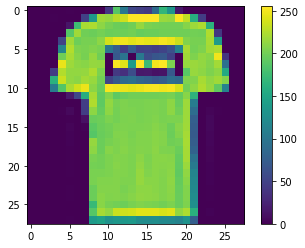

In [13]:
plt.figure()
plt.imshow(train_img[1])
plt.colorbar()
plt.grid(False)
plt.show()

10


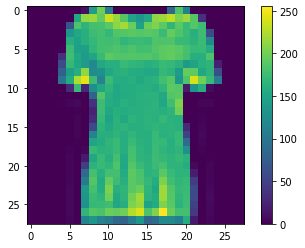

11


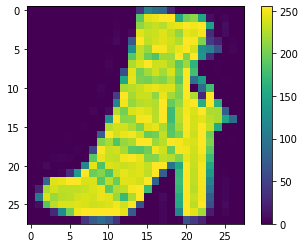

12


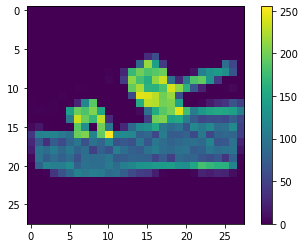

13


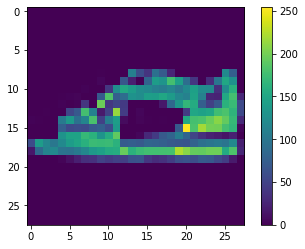

14


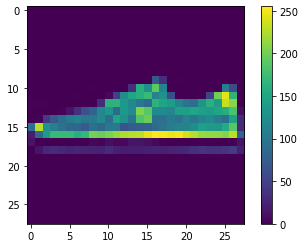

In [14]:
for i in range(10,15):
    print(i)
    plt.figure()
    plt.imshow(train_img[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

신경망 모델에 주입하기 전에 이값의 범위를 0~1 사이로 조정한다.    
이렇게 하기위해서는 255로 나누어야 한다.       
훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요하다.

In [15]:
train_img = train_img / 255.0
test_img = test_img / 255.0

훈련 세트에서 25개의 이미지와 그아래 클래스 이름을 출력      
데이터 포멧이 올바른지 확인하고 네트워크 구성과 훈련할 준비     

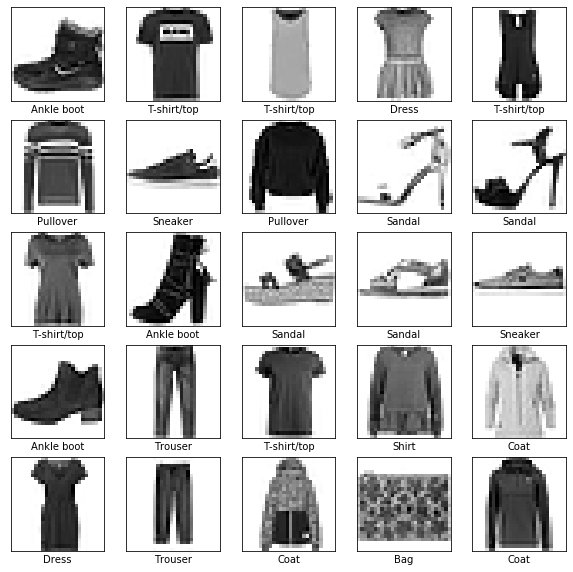

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labs[i]])
plt.show()

# 모델 구성 

신경망 모델을 만들려면 모델의 층을 구성한다음에 모델을 컴파일한다. 

## 층설정 

신경망의 기본 구성 요소는 레이어이다.      
레이어는 주입된 데이터에서 표현을 추출한다.     
문제를 해결하는 데에 있어 더 의미있는 표현이 추출될것이다.    

대부분의 딥러닝을 간단한 층을 연결하여 구성된다.      
`tf.keras.layers.Dense`와 같은 레이어들의 가중치(parameter)는 훈련하는 동안 학습된다.

In [17]:
# 모델 생성 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



```py

from keras.models import Sequential
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
# 학습 과정을 조정가능하다.
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))
              
# ---

# 모델 생성 
model = keras.Sequential([

    # 1번층 keras.layers.Flatten은 
    # 2차원 배열(28\*28)픽셀의 이미지 포멧 
    # 28\*28 =784픽셀의 1차원 배열로 변환 
    # -> 이미지에 있는 픽셀의 행을 펼처서 일렬로 늘린다. 
    # 이층은 학습되는 가중치는 없고 데이터를 변환만 한다.  
    
    keras.layers.Flatten(input_shape=(28,28)), 
                                               
    # 픽셀을 펼친 후에는 두개의 tf.keras.layers.Dense 층이 연속되어 연결
    # 이 층을 밀집연결(densely-connected) 또는 완전 연결(fully-connected) 층
    # 첫번째 Dense 층은 128개의 노드(뉴런)를 가짐
    
    keras.layers.Dense(128, activation='relu'), 
    
    # 두번째 Dense(마지막층)은  10개의 노드의 소프트 맥스 층
    # 10개의 확률을 반환하고 반환된 값의 전체의 합은 1
    # 각 노드는 현재 이미지가 10개의 클래스 중 하나에 속할 확률을 출력 
    
    keras.layers.Dense(10, activation='softmax')
])

```

## 모델 컴파일 

모델 훈련하기 전에 필요한 몇 가지 설정을 모델 컴파일 단계에서 추가 

- 손실함수(Loss function)
    - 훈련 하는 동안 모델의 오차를 측정
    - 모델의 학습이 몰바른 방향으로 향하도록 이 함수를 최소화
    
- 옵티마이저(Optimizer)
    - 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정 
    - 학습속도를 빠르고 안정적이게 하는것 
    
    
- 지표(Metrics)
    - 훈련단계와 테스트 간계를 모니터링 하기위해 사용
    - 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용
    

```py

model.compile( optimizer='adam', # 옵티마이저
               loss='sparse_categorical_crossentropy', # 손실값
               metrics=['accuracy'] # 지표 
             )
         
         
# adam : 둘다 고려해서 방향을 찾자 -> Momentum 과 AdaGrad 를 융합한 방법

```
[딥러닝 용어정리, Momentum, AdaGrad 설명](https://light-tree.tistory.com/140)

In [18]:
model.compile( optimizer='adam', # 옵티마이저
               loss='sparse_categorical_crossentropy', # 손실값
               metrics=['accuracy'] # 지표 
             )

# 모델 훈련

신경망 모델을 훈련하는 단계

1. 훈련데이터를 모델에 주입 
    - 트레인 이미지와 테스트 이미지의 배열 
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움 
3. 테스트 세트에 대한 모델의 예측
    - 트레인 이미지의 배열 
    - 이 예측이 트레인 레이블의 배열과 맞는지 확인 
    
 훈련을 시작하기 앞서서 model.fit 메서드를 호출하여 모델에 훈련을 시킴 


In [19]:
# 학습 모델 만들기
# model.fit(train_img, train_labs, epochs=5)
model.fit(train_img, train_labs, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4983 - acc: 0.8266
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3719 - acc: 0.8657
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3362 - acc: 0.8762
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3117 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2942 - acc: 0.8912
Epoch 6/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2797 - acc: 0.8964
Epoch 7/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2668 - acc: 0.9007
Epoch 8/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2562 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.2469 - acc: 0.9078
Epoch 10/10
60000/60000 [==============================] - 

```py
# 배치의 형태로 트레이닝 데이터에 대한 반복작업을 수행
model.fit(x_train, y_train, epochs=5, batch_size=32)

# 수동으로 전달 
model.train_on_batch(x_batch, y_batch)

```

# 정확도 평가 

테스트 세트에서 모델의 성능을 비교 

In [20]:
# 정확도 , 손실값
test_loss, test_acc = model.evaluate(test_img, test_labs, verbose=2)
print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.3226 - acc: 0.8869

테스트 정확도: 0.8869


 테스트 세트의 정확도가 훈련 세트의 정확도 보다 조금 낮다.     
 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting)때문     
 과대적합은 머신러닝의 모델이 훈련데이터 보다 새로운 데이터에서 성능이 낮아지는 현상 

```py
# 모델의 성능을 평가 
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
```

# 예측 만들기 
 훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있다. 

In [21]:
predictions = model.predict(test_img)

In [23]:
predictions[0]

array([1.1957558e-06, 2.2993031e-08, 6.2025176e-09, 5.7630176e-09,
       1.1981914e-05, 1.8121134e-03, 2.9238856e-07, 1.9231623e-02,
       1.0296580e-05, 9.7893244e-01], dtype=float32)

```py
# 예측 
classes = model.predict(x_test, batch_size=128)
```

이 예측은 10개의 숫자를 배열로 나타낸다.      
이값은 10개의 옷 품목에 상응하는 모델의 신뢰도를 나타낸다.        
우리는 가장 높은 신뢰도를 가진 레이블을 찾아 보아야 한다.     

In [24]:
np.argmax(predictions[0]) # 앵글부트라로 가장확신 

9

10개 클래스에 대한 예측을 그래프로 표현

In [26]:
# 함수 
def plot_image(i, predictions_array, true_label, img):
    #  예측값 , 정답 레이블 , 이미지 
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([]) # 네임
    plt.yticks([]) # 네임
    
    plt.imshow(img, cmap=plt.cm.binary)
    # 레이블 
    predicted_label = np.argmax(predictions_array)
    # 만약 예측레이블이 정답과 같다면  아래와 같은 색을 출력하라 
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # x레이블에는 정답일 확률도 출력 -> 오답일때 어떤오답인지 보여준다.
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [34]:
# 정답일 확률을 그래프로 그려서 보여준다. 
def plot_value_array(i, predictions_array, true_label):
    #  예측값 , 정답 레이블 , 이미지 
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # 
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) # 이게 뭔지 모르겠다.
    # 
    predicted_label = np.argmax(predictions_array)
    #  오답일때 붉은색 , 정답일때 파란색
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

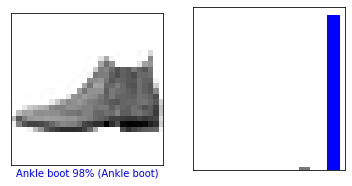

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labs, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labs)
plt.show()

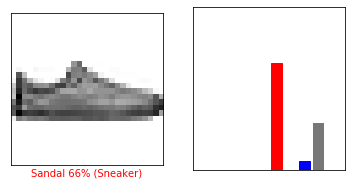

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labs, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labs)
plt.show()

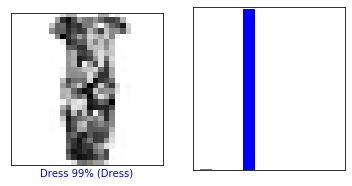

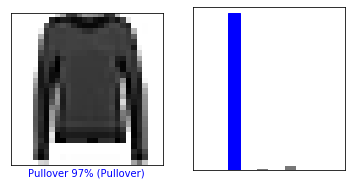

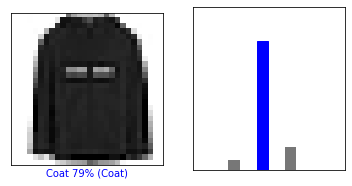

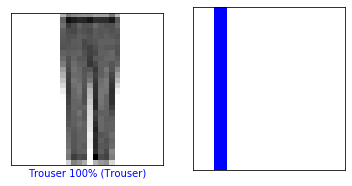

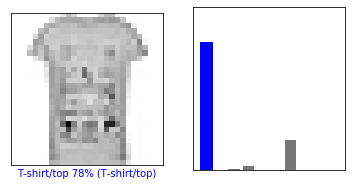

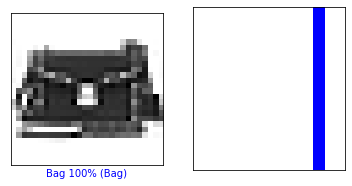

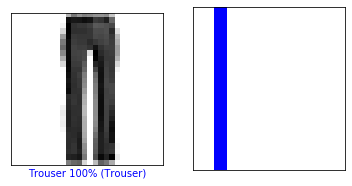

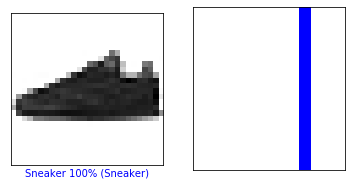

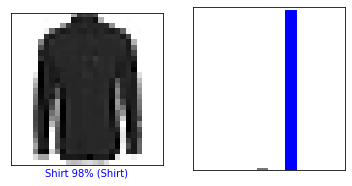

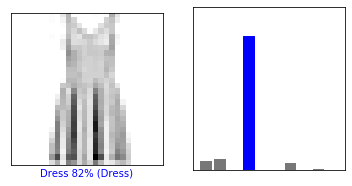

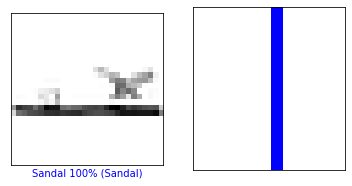

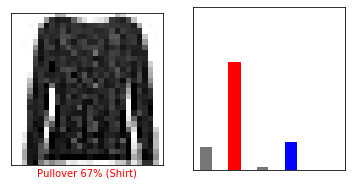

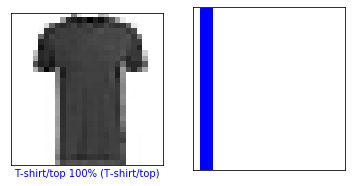

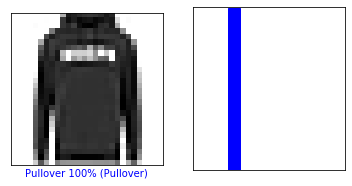

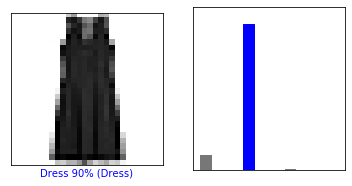

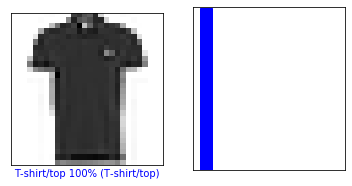

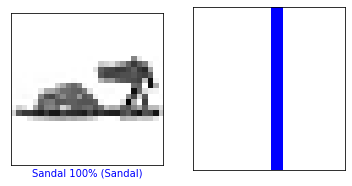

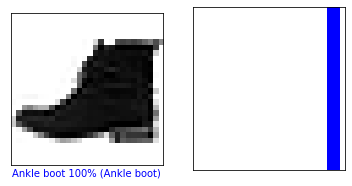

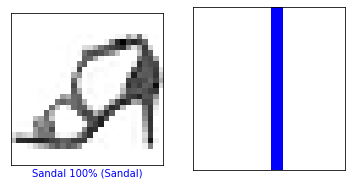

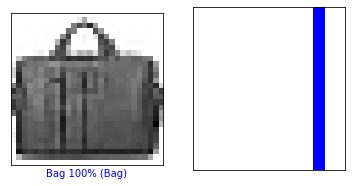

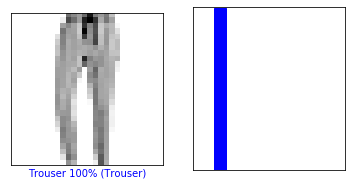

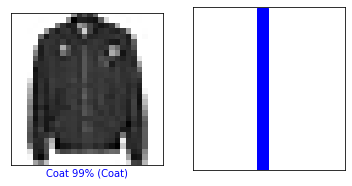

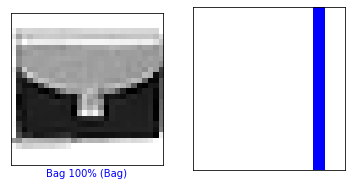

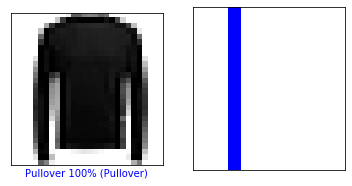

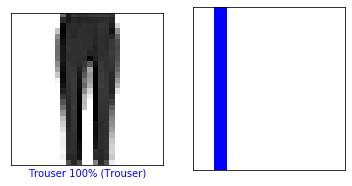

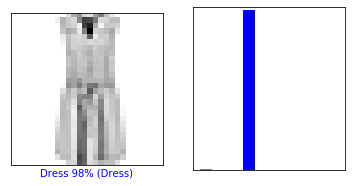

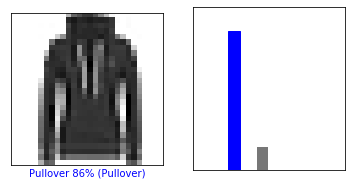

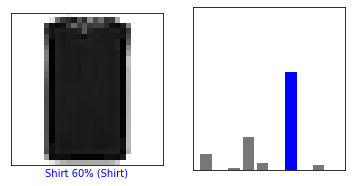

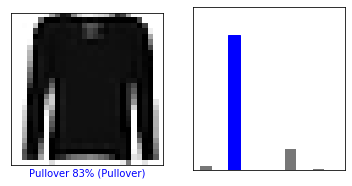

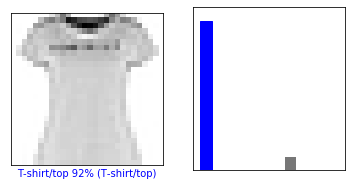

In [42]:
for i in range(100,70,-1):
#     print(i)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labs, test_img)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labs)
    plt.show()

몇 개의 이미지의 예측을 출력해 보면 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색으로 나타난다. 

숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)이다.
신뢰도 점수가 높을 때도 잘못 예측할 수 있다.

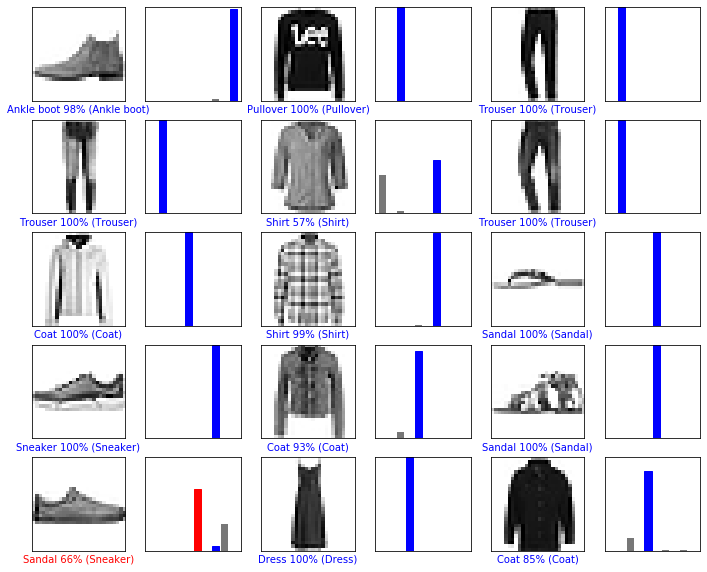

In [44]:
# 처음 x개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력한다. 
# 올바른 예측은 파랑색으로  잘못된 예측은 빨강색으로 나타낸다. 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labs, test_img)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labs)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다. 

In [41]:
num_images

15

In [46]:
# 테스트 세트에서 이미지 하나를 선택합니다. 
img = test_img[0]

print(img.shape)

(28, 28)


케라스 모델은 한번에 샘플의 묶음 또는 배치 